## Overview


- The goal is to analyse the Telecom churn Dataset and create a ML Model to predict the Churning to retain the customers
- The Entire model was analysed and created using SQL,Pyspark in Databricks

#### The data set includes information about:
- Customers who left within the last month – the column is called Churn Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

#### The steps inclucdes
1.Data Analysis
2. Exploratory Analysis
3. Model Transformers and Estimators
4. Spark Machine Learning Pipeline
5. ML Algorithm
6. Model Evaluation and Metrics

In [0]:
# File location and type
file_location = "/FileStore/tables/WA_Fn_UseC__Telco_Customer_Churn.csv"
file_type = "csv"


# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.csv(file_location, header=True,inferSchema=True)

In [0]:
#display(df)

In [0]:
df.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: string (nullable = true)
 |-- Churn: string (nullable = true)



In [0]:
from pyspark.sql.functions import col, isnan, when, isnull, count

# Check for null and nan values in all columns
null_counts = df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns])
null_counts.show()


+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|Contract|PaperlessBilling|PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
|         0|     0|            0|      0|         0|     0|           0|            0|              0|             0|           0|               0|          0|          0|              0|       0|               0| 

In [0]:
# creating a temporary table called churn_analysis
df.createOrReplaceTempView("churn_analysis")

In [0]:
# Can convert and analyse the data into two methods, when the dataset is small,
# 1. To Pandas Dataframe
# 2. To SQL

In [0]:
#converting the temporary table to pandas df
pd_df = df.toPandas()

In [0]:
pd_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


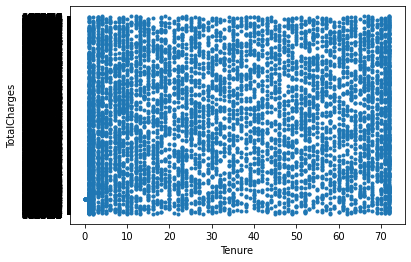

In [0]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(pd_df['tenure'],pd_df['TotalCharges'],'.')
plt.xlabel('Tenure')
plt.ylabel('TotalCharges')
display()

In [0]:
%sql
select *
from churn_analysis
limit 5

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [0]:
df.groupBy('Churn').count().show()

+-----+-----+
|Churn|count|
+-----+-----+
|   No| 5174|
|  Yes| 1869|
+-----+-----+



In [0]:
df.select('tenure','MonthlyCharges','TotalCharges').describe().show()

+-------+------------------+------------------+------------------+
|summary|            tenure|    MonthlyCharges|      TotalCharges|
+-------+------------------+------------------+------------------+
|  count|              7043|              7043|              7043|
|   mean| 32.37114865824223| 64.76169246059922|2283.3004408418697|
| stddev|24.559481023094442|30.090047097678482| 2266.771361883145|
|    min|                 0|             18.25|                  |
|    max|                72|            118.75|             999.9|
+-------+------------------+------------------+------------------+



In [0]:
%sql
select gender, churn, count(churn) 
from churn_analysis 
group by gender, churn


gender,churn,count(churn)
Male,No,2625
Male,Yes,930
Female,No,2549
Female,Yes,939


Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

In [0]:
%sql
select SeniorCitizen, churn, count(churn)
from churn_analysis 
group by SeniorCitizen, churn

SeniorCitizen,churn,count(churn)
1,No,666
0,No,4508
0,Yes,1393
1,Yes,476


Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

In [0]:
%sql
select tenure, churn, count(churn) as ChurnCount 
from churn_analysis
group by tenure, churn 
 

tenure,churn,ChurnCount
46,Yes,12
27,No,59
15,Yes,37
60,No,70
71,Yes,6
33,No,50
3,Yes,94
14,Yes,24
46,No,62
47,No,54


Databricks visualization. Run in Databricks to view.

In [0]:
%sql
select SeniorCitizen, count(SeniorCitizen), InternetService
from churn_analysis
group by SeniorCitizen, InternetService

SeniorCitizen,count(SeniorCitizen),InternetService
0,2265,Fiber optic
1,831,Fiber optic
1,259,DSL
0,2162,DSL
1,52,No
0,1474,No


Databricks visualization. Run in Databricks to view.

In [0]:
%sql
select PaperlessBilling, churn, count(*)
from churn_analysis
group by PaperlessBilling, churn

PaperlessBilling,churn,count(1)
Yes,Yes,1400
No,No,2403
Yes,No,2771
No,Yes,469


Databricks visualization. Run in Databricks to view.

In [0]:
%sql
select PaymentMethod, churn, count(*)
from churn_analysis
group by PaymentMethod, churn

PaymentMethod,churn,count(1)
Credit card (automatic),No,1290
Bank transfer (automatic),No,1286
Mailed check,Yes,308
Credit card (automatic),Yes,232
Electronic check,No,1294
Electronic check,Yes,1071
Bank transfer (automatic),Yes,258
Mailed check,No,1304


Databricks visualization. Run in Databricks to view.

In [0]:
Temp_df = df

from pyspark.sql.functions import col

# since TotalCharges col is string, converting it to numeric
# Define the input and output column names
input_col = 'TotalCharges'
output_col = 'TotalCharges_numeric'

# Convert the string column to a numeric datatype
df = Temp_df.withColumn(output_col, col(input_col).cast('double'))

In [0]:
df.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: string (nullable = true)
 |-- Churn: string (nullable = true)
 |-- TotalCharges_numeric: double (nullable = true)



In [0]:
churn_df = df

##train test split
train_data,test_data=churn_df.randomSplit([0.7,0.3])

print(train_data.count())
print(test_data.count())

5005
2038


In [0]:
 churn_df.columns

Out[210]: ['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'TotalCharges_numeric']

In [0]:
#Creating a pipeline 
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder,StringIndexer, VectorAssembler

catcolumns = [
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [0]:
# creating  stages for pipeline
# Labelling and Encoding the categorical value

#list to store pipeline stages
stages = []
for cat in catcolumns:
    
    stringIndexer = StringIndexer(inputCol=cat,outputCol=cat + "Index")
    
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[cat+ "catVec"])
    
    
    stages += [stringIndexer,encoder]



In [0]:
stages

Out[213]: [StringIndexer_0d4c8afb7515,
 OneHotEncoder_6dd7072646e0,
 StringIndexer_6c27e259e031,
 OneHotEncoder_172ba11a7a9b,
 StringIndexer_eb7cb1ddf0a7,
 OneHotEncoder_6f628d736a9d,
 StringIndexer_3045f631a869,
 OneHotEncoder_7d966664f75b,
 StringIndexer_a7428a4fe7fb,
 OneHotEncoder_2d7728366785,
 StringIndexer_55bc9acd843a,
 OneHotEncoder_5585fa0e2dfd,
 StringIndexer_b3b707a09852,
 OneHotEncoder_6c260fd10b5e,
 StringIndexer_d4e390c9f419,
 OneHotEncoder_d4a9685fb27f,
 StringIndexer_f28cc0dc78d3,
 OneHotEncoder_277db50c5c55,
 StringIndexer_a1c6f339e13d,
 OneHotEncoder_5d48759f7a62,
 StringIndexer_28b9ad33d161,
 OneHotEncoder_7cfe7d13ddb5,
 StringIndexer_6b3a03cfe7a2,
 OneHotEncoder_0fd8660623ff,
 StringIndexer_64c0ef231cc9,
 OneHotEncoder_ac7f3b0b7805,
 StringIndexer_6a265e41d874,
 OneHotEncoder_fa4b97b7331f,
 StringIndexer_d0df68850bc1,
 OneHotEncoder_b71d89e4fe8f,
 StringIndexer_a6fa53a19b0f,
 OneHotEncoder_6c988b64ddc7]

In [0]:
# #imputing the missing values in numerical column
from pyspark.ml.feature import Imputer
imputer = Imputer(inputCols = ['TotalCharges_numeric'],outputCols=['Out_TotalCharges'])
stages +=[imputer]

In [0]:
#indexing the target column
label_index = StringIndexer(inputCol='Churn',outputCol='label')
stages += [label_index]

In [0]:
%sql
select tenure, churn, count(*)
from churn_analysis
where churn = 'Yes'
group by tenure, churn
order by tenure


tenure,churn,count(1)
1,Yes,380
2,Yes,123
3,Yes,94
4,Yes,83
5,Yes,64
6,Yes,40
7,Yes,51
8,Yes,42
9,Yes,46
10,Yes,45


In [0]:
# as we can see that tenure increase, churn gets decreased
# so we creating a buckets for tenure, The QuantileDiscretizer transformer divides a continuous column into a specified number of quantile-based bins

from pyspark.ml.feature import QuantileDiscretizer
# Create the QuantileDiscretizer transformer
tenure_bin = QuantileDiscretizer(numBuckets=3, inputCol='tenure', outputCol='tenure_bin')
stages+= [tenure_bin]


In [0]:
# adding the numerical cols and categorical columns together
numericCols = ['tenure_bin','Out_TotalCharges', 'MonthlyCharges']
assembleInputs = [c + "catVec" for c in catcolumns] + numericCols

In [0]:
# creating vector assembler and adding it to the stages
assembler = VectorAssembler(inputCols=assembleInputs,outputCol='features')
stages+=[assembler]

In [0]:
stages

Out[222]: [StringIndexer_0d4c8afb7515,
 OneHotEncoder_6dd7072646e0,
 StringIndexer_6c27e259e031,
 OneHotEncoder_172ba11a7a9b,
 StringIndexer_eb7cb1ddf0a7,
 OneHotEncoder_6f628d736a9d,
 StringIndexer_3045f631a869,
 OneHotEncoder_7d966664f75b,
 StringIndexer_a7428a4fe7fb,
 OneHotEncoder_2d7728366785,
 StringIndexer_55bc9acd843a,
 OneHotEncoder_5585fa0e2dfd,
 StringIndexer_b3b707a09852,
 OneHotEncoder_6c260fd10b5e,
 StringIndexer_d4e390c9f419,
 OneHotEncoder_d4a9685fb27f,
 StringIndexer_f28cc0dc78d3,
 OneHotEncoder_277db50c5c55,
 StringIndexer_a1c6f339e13d,
 OneHotEncoder_5d48759f7a62,
 StringIndexer_28b9ad33d161,
 OneHotEncoder_7cfe7d13ddb5,
 StringIndexer_6b3a03cfe7a2,
 OneHotEncoder_0fd8660623ff,
 StringIndexer_64c0ef231cc9,
 OneHotEncoder_ac7f3b0b7805,
 StringIndexer_6a265e41d874,
 OneHotEncoder_fa4b97b7331f,
 StringIndexer_d0df68850bc1,
 OneHotEncoder_b71d89e4fe8f,
 StringIndexer_a6fa53a19b0f,
 OneHotEncoder_6c988b64ddc7,
 Imputer_4ba241ff04b7,
 StringIndexer_2f451e6c23df,
 QuantileD

In [0]:
# Fit the pipeline to the data in the stages
pipeline = Pipeline().setStages(stages)



In [0]:
#fitting the training data to the pipeline
pipeline_model = pipeline.fit(train_data)

In [0]:
# transforming the trianing and testing data
trainprepDF = pipeline_model.transform(train_data)
testprepDF = pipeline_model.transform(test_data)

In [0]:
trainprepDF.head(1)

Out[226]: [Row(customerID='0002-ORFBO', gender='Female', SeniorCitizen=0, Partner='Yes', Dependents='Yes', tenure=9, PhoneService='Yes', MultipleLines='No', InternetService='DSL', OnlineSecurity='No', OnlineBackup='Yes', DeviceProtection='No', TechSupport='Yes', StreamingTV='Yes', StreamingMovies='No', Contract='One year', PaperlessBilling='Yes', PaymentMethod='Mailed check', MonthlyCharges=65.6, TotalCharges='593.3', Churn='No', TotalCharges_numeric=593.3, genderIndex=0.0, gendercatVec=SparseVector(1, {0: 1.0}), SeniorCitizenIndex=0.0, SeniorCitizencatVec=SparseVector(1, {0: 1.0}), PartnerIndex=1.0, PartnercatVec=SparseVector(1, {}), DependentsIndex=1.0, DependentscatVec=SparseVector(1, {}), PhoneServiceIndex=0.0, PhoneServicecatVec=SparseVector(1, {0: 1.0}), MultipleLinesIndex=0.0, MultipleLinescatVec=SparseVector(2, {0: 1.0}), InternetServiceIndex=1.0, InternetServicecatVec=SparseVector(2, {1: 1.0}), OnlineSecurityIndex=0.0, OnlineSecuritycatVec=SparseVector(2, {0: 1.0}), OnlineBack

In [0]:
# creating the model
from pyspark.ml.classification import LogisticRegression

#create initial LogisticRegression model
lr = LogisticRegression(featuresCol='features', labelCol='label',maxIter =10)

#Train model with Training Data
lrmodel = lr.fit(trainprepDF)

In [0]:
print('Coefficients: '+ str(lrmodel.coefficients))
print('Intercept'+ str(lrmodel.intercept))


Coefficients: [0.0028129854795727488,-0.07540101390847025,0.01971294721569972,0.1970091116846428,-0.4190033517075796,-0.2671488837549039,0.1250826134899891,0.5146373670989914,-0.3083879175482387,0.3344474672480789,-0.12743455604197296,0.1975183140288026,0.03998783760529354,0.09685605800155023,0.1499257418095531,0.3014526867364221,-0.0861361928187733,0.03045525333383356,0.21445901978648002,-0.033020034663267875,0.27794465714689964,0.9021758538651625,-0.7668515196161254,0.2662755729515745,0.28244723464706845,0.020882334714025477,-0.15953645356942947,-0.6299287371858859,-0.00011767063170759889,0.005493136707689048]
Intercept-2.0121611761766074


In [0]:
summary = lrmodel.summary

In [0]:
# Compute evaluation metrics using the summary object
accuracy = summary.accuracy
weightedFalsePositiveRate = summary.weightedFalsePositiveRate
weightedTruePositiveRate = summary.weightedTruePositiveRate
precision = summary.weightedPrecision
recall = summary.weightedRecall
fMeasure = summary.weightedFMeasure()

# Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Weighted False Positive Rate: ", weightedFalsePositiveRate)
print("Weighted True Positive Rate: ", weightedTruePositiveRate)
print("Precision: ", precision)
print("Recall: ", recall)
print("FMeasure: ", fMeasure)

Accuracy:  0.8055944055944056
Weighted False Positive Rate:  0.362333437706572
Weighted True Positive Rate:  0.8055944055944056
Precision:  0.7969658873642531
Recall:  0.8055944055944056
FMeasure:  0.7992276541728398


In [0]:
display(lrmodel,trainprepDF,'ROC')

False Positive Rate,True Positive Rate,Threshold
0.0,0.0,0.834203559559326
0.0,0.03333333333333333,0.834203559559326
0.012345679012345678,0.03333333333333333,0.7312975154088679
0.012345679012345678,0.06666666666666667,0.7097183432943073
0.012345679012345678,0.1,0.7039227791855401
0.024691358024691357,0.1,0.6929009891869407
0.024691358024691357,0.13333333333333333,0.6828663554209569
0.024691358024691357,0.16666666666666666,0.6818351126424953
0.024691358024691357,0.2,0.6744827126880684
0.024691358024691357,0.23333333333333334,0.6639486495508922


In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator


# Make predictions on the test data
predictions = lrmodel.transform(testprepDF)

# Instantiate the BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator( rawPredictionCol='rawPrediction')

# Compute the area under the ROC curve
areaUnderROC = evaluator.evaluate(predictions, {evaluator.metricName: 'areaUnderROC'})

# Compute the area under the precision-recall curve
areaUnderPR = evaluator.evaluate(predictions, {evaluator.metricName: 'areaUnderPR'})

# Print the evaluation results
print("Area under ROC: ", areaUnderROC)
print("Area under PR: ", areaUnderPR)

Area under ROC:  0.8295912587878758
Area under PR:  0.6308645260346598


In [0]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics


# Get the probability and label columns from the predictions DataFrame
results = predictions.select('prediction', 'label')
results_collect = results.collect()
results_list = [(float(i[0]),float(i[1])) for i in results_collect]
predictionAndLabels = sc.parallelize(results_list)
                                  

# Instantiate the BinaryClassificationMetrics object
metrics = BinaryClassificationMetrics(predictionAndLabels)

# Compute evaluation metrics
area_under_roc = metrics.areaUnderROC


# Print the evaluation metrics
print("Area Under ROC: ", area_under_roc)

/databricks/spark/python/pyspark/sql/context.py:165: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Area Under ROC:  0.7002285124305624
